<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/Exploring_factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
#link google colab and google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# path to file in google drive

file_path = "/content/gdrive/My Drive/Colab Notebooks/MiklyaeveAV.csv"
data = pd.read_csv(file_path)
data

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,1,1,3,2,5,0,100,7,4,63.64,...,2,0,0,1,3,3,0,19,4,1
1,2,1,0,4,5,1,90,4,7,36.36,...,0,0,1,0,3,2,0,22,5,1
2,3,1,0,3,4,3,70,6,5,54.55,...,0,0,0,0,3,3,0,18,5,1
3,4,1,0,3,7,0,100,10,1,90.91,...,2,1,2,3,3,0,0,24,5,2
4,5,1,0,2,8,0,100,9,2,81.82,...,1,2,0,2,4,2,0,22,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,0,10,0,0,0,100,11,0,100.00,...,0,0,0,0,0,0,1,18,4,1
565,566,0,0,1,8,1,90,9,2,81.82,...,2,2,2,2,2,2,0,15,2,1
566,567,0,2,1,2,3,50,6,5,54.55,...,3,4,2,4,4,1,0,14,3,1
567,568,0,1,0,9,0,100,10,1,90.91,...,3,0,2,0,2,4,0,16,3,1


In [4]:
! pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 877.2 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 27.7 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=3d0e1b75d90ca25f524686bc897c9cdc06307bd6a0f20279e0bff53c05f8cf8a
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


Factor Loadings Table:


,Factor 1,Factor 2,Factor 3
Компонент знаний,0.091156,0.343366,0.094505
Компонент ответственности (обеспечения безопасности),0.267339,-0.019540,0.064815
Компонент умений,0.407995,-0.007146,0.121047
"1. Для развлечения, отдыха",0.032960,-0.000659,0.515373
2. Для общения,0.051200,0.124120,0.624237
3. Для учебы,0.170822,0.482549,0.471498
"4. Для поиска информации, не связанной с учебой",0.130458,0.196712,0.547155
5. Для покупок,0.311530,0.024135,0.471487
"1. Поиск готовых решений и ответов, выполненных заданий",0.231039,-0.085474,0.331908
"2. Поиск дополнительной информации, которой нет в учебниках",0.296489,0.414543,0.251371


Bartlett’s Test:
Chi-Square Value: 3369.534647921511
P-value: 0.0

Kaiser-Meyer-Olkin (KMO) Test:
KMO Overall: [0.68259453 0.66416908 0.72105837 0.77484985 0.78993422 0.87004559
 0.87931469 0.83228316 0.80037235 0.8839906  0.89739236 0.89138099
 0.89139245 0.84036164 0.87193531 0.84783963 0.84267413 0.87910052
 0.59979466 0.73358587 0.70067757 0.57156555]
KMO Model: 0.8295899626307125


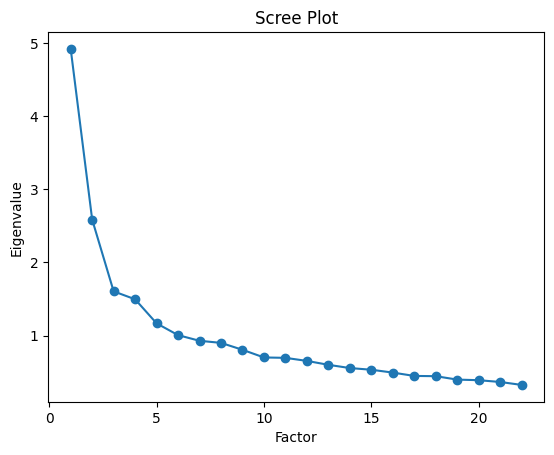


Principal Axes Factor Analysis:
     Factor 1  Factor 2  Factor 3
0   -0.270670  1.148434  0.478785
1   -1.781962  0.321965 -0.871738
2   -1.324638  0.252939 -0.591891
3    0.040455  1.035317 -0.678181
4   -0.274824  0.522864  0.316285
..        ...       ...       ...
564 -1.294007 -1.162174 -4.123118
565 -0.005686 -1.510059 -0.260564
566  0.432080 -1.339021  0.666088
567 -0.244979  0.004577  0.948797
568  1.720104 -1.194655  0.184351

[569 rows x 3 columns]


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from IPython.display import display, HTML

# Assume you have loaded your data into the 'data' DataFrame

# Specify the variables you want to include in the factor analysis
selected_variables = ['Компонент знаний',
 'Компонент ответственности (обеспечения безопасности) ',
 'Компонент умений',
 '1. Для развлечения, отдыха',
 '2. Для общения',
 '3. Для учебы',
 '4. Для поиска информации, не связанной с учебой',
 '5. Для покупок',
 '1. Поиск готовых решений и ответов, выполненных заданий',
 '2. Поиск дополнительной информации, которой нет в учебниках',
 '4. Просмотр видеоуроков',
 '5. Просмотр научно-популярных и художественных фильмов, которые нужны для учебы',
 '6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам',
 '7. Моделирование экспериментов в виртуальной среде',
 '8. Дополнительные занятия (например, по скайпу)',
 '9. Участие в онлайн-олимпиадах и конкурсах',
 '10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)',
 '11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)',
 'Ваш пол:', 'Ваш возраст:', 'Как Вы учитесь в этом году?',
  'Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет'
 ]  # Replace with the actual variable names you want to include

# Create a new DataFrame with only the selected variables
selected_data = data[selected_variables]

# Specify the number of factors you want to extract
num_factors = 3

# Initialize the factor analyzer with the desired number of factors
factor_analyzer = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

# Fit the model to your selected data
factor_analyzer.fit(selected_data)

# Get the factor loadings
factor_loadings = factor_analyzer.loadings_

# Create a pandas DataFrame from the factor loadings
factor_loading_df = pd.DataFrame(factor_loadings, columns=[f'Factor {i+1}' for i in range(num_factors)], index=selected_data.columns)

# Print the factor loadings table with grid lines using HTML
print("Factor Loadings Table:")
display(HTML(factor_loading_df.to_html()))

# Bartlett’s Test
chi_square_value, p_value = calculate_bartlett_sphericity(selected_data)
print("Bartlett’s Test:")
print("Chi-Square Value:", chi_square_value)
print("P-value:", p_value)

# Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(selected_data)
print("\nKaiser-Meyer-Olkin (KMO) Test:")
print("KMO Overall:", kmo_all)
print("KMO Model:", kmo_model)

# Scree Plot
ev, v = factor_analyzer.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

# Principal Axes Factor analysis
factor_analyzer_method = factor_analyzer.transform(selected_data)
principal_axes_factor_df = pd.DataFrame(factor_analyzer_method, columns=[f'Factor {i+1}' for i in range(num_factors)])

print("\nPrincipal Axes Factor Analysis:")
print(principal_axes_factor_df)


In [13]:
# path to file in google drive

file_pupils = "/content/gdrive/My Drive/Colab Notebooks/pupils.csv"
pupils = pd.read_csv(file_pupils)
pupils

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,307,0,1,4,4,1,90,6,5,54.55,...,4,0,4,4,4,4,0,18,3,1
1,308,0,0,2,8,0,100,10,1,90.91,...,2,2,1,1,3,1,0,15,4,1
2,309,0,9,1,0,0,100,8,3,72.73,...,4,4,4,4,4,4,0,18,4,1
3,310,0,3,3,2,1,80,11,0,100.00,...,4,2,4,4,4,1,1,15,5,1
4,311,0,5,2,2,1,90,11,0,100.00,...,1,1,1,4,0,0,1,15,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,565,0,10,0,0,0,100,11,0,100.00,...,0,0,0,0,0,0,1,18,4,1
259,566,0,0,1,8,1,90,9,2,81.82,...,2,2,2,2,2,2,0,15,2,1
260,567,0,2,1,2,3,50,6,5,54.55,...,3,4,2,4,4,1,0,14,3,1
261,568,0,1,0,9,0,100,10,1,90.91,...,3,0,2,0,2,4,0,16,3,1


In [14]:
# path to file in google drive

file_students = "/content/gdrive/My Drive/Colab Notebooks/students.csv"
students = pd.read_csv(file_students)
students

,№,Студенты (1)школьники(0),Использую для учебных и образовательных целей,"Использую в целях, не связанных с обучением или образованием","Использую и для учебных, и для не учебных целей",Не использую,Компонент знаний,Умею,Не умею,Компонент ответственности (обеспечения безопасности),...,"6. Тесты и тренажеры для самопроверки, подготовки к экзаменам и контрольным работам",7. Моделирование экспериментов в виртуальной среде,"8. Дополнительные занятия (например, по скайпу)",9. Участие в онлайн-олимпиадах и конкурсах,"10. Обмен информацией, связанной с учебой, с одногруппниками (в мессенджерах, социальных сетях)","11. Обмен информацией, связанной с учебой, с преподавателями (в мессенджерах, социальных сетях)",Ваш пол:,Ваш возраст:,Как Вы учитесь в этом году?,"Какое техническое устройство Вы предпочитаете использовать для того, чтобы искать в интернете информацию, необходимую для выполнения учебных заданий? Выберите один вариант, который для Вас наиболее предпочтителен:1 смартфон,2 комп/ноут,3 планшет"
0,1,1,3,2,5,0,100,7,4,63.64,...,2,0,0,1,3,3,0,19,4,1
1,2,1,0,4,5,1,90,4,7,36.36,...,0,0,1,0,3,2,0,22,5,1
2,3,1,0,3,4,3,70,6,5,54.55,...,0,0,0,0,3,3,0,18,5,1
3,4,1,0,3,7,0,100,10,1,90.91,...,2,1,2,3,3,0,0,24,5,2
4,5,1,0,2,8,0,100,9,2,81.82,...,1,2,0,2,4,2,0,22,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,302,1,0,0,9,0,90,11,0,100.00,...,2,2,2,1,3,2,0,24,5,2
302,303,1,1,1,7,0,90,10,1,90.91,...,0,0,0,1,3,1,1,21,4,2
303,304,1,0,0,9,0,90,7,4,63.64,...,3,0,2,0,3,3,0,20,4,1
304,305,1,0,2,8,0,100,11,0,100.00,...,2,0,0,0,4,2,0,19,4,1
